# Project: Investigate a Dataset (Movie data analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
Dataset contains information about 10,000 movies collected from The Movie Database (TMDb),it saves in csv formate and it is contain many properties about movie like genres , cast in movies,popularity ,voting,financial data,release date and others.


In [1]:
# import used library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.



### Data Cleaning (Load ,deal with missing data and not needed columns)

In [2]:
# Load data and display sample
movi_df=pd.read_csv("tmdb-movies.csv")
movi_df.head(5)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...     6/9/2015       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...    5/13/2015       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...    3/18/2015       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot   12/15/2015       5292   
4  Universal Pictures|Original Film|Media Rights ...     4/1/2015       2947   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  
1           7.1          2015  137999939.3  3.481613e+08  
2           6.3          2015  101199955.5  2.716190e+08  
3           7.5          2015  183999919.0  1.902723e+09  
4           7.3          2015  174799923.1  1.385749e+09  

[5 rows x 21 columns]

In [3]:
movi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movi_df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [5]:
movi_df.shape

(10866, 21)

In [6]:
movi_df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# drop columns that not useful in analysis 
movi_df.drop(columns=["imdb_id","id","homepage","tagline","vote_count","vote_average","keywords"],inplace=True)

In [8]:
movi_df.fillna("Not Available",inplace=True)

In [9]:
movi_df.shape

(10866, 14)

In next scetion  i will try to get answer of the following two question by analyze and visualize data
1-Which genres are most popular from year to year?
2-What kinds of properties are associated with movies that have high revenues

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

In [10]:
#Create new dataframe to only contain data needed for question one for simplicty
df=pd.DataFrame()
df['popularity']=movi_df['popularity']
df['release_year'] = movi_df['release_year'] 
df['genres']= movi_df['genres']
#convert genres string to list as a preparation step to convert each  new item list to new column
df['genreslist']=df['genres'].str.split("|")

df.head()

popularity  release_year                                     genres  \
0   32.985763          2015  Action|Adventure|Science Fiction|Thriller   
1   28.419936          2015  Action|Adventure|Science Fiction|Thriller   
2   13.112507          2015         Adventure|Science Fiction|Thriller   
3   11.173104          2015   Action|Adventure|Science Fiction|Fantasy   
4    9.335014          2015                      Action|Crime|Thriller   

                                       genreslist  
0  [Action, Adventure, Science Fiction, Thriller]  
1  [Action, Adventure, Science Fiction, Thriller]  
2          [Adventure, Science Fiction, Thriller]  
3   [Action, Adventure, Science Fiction, Fantasy]  
4                       [Action, Crime, Thriller]

In [11]:
#function to convert each  new item genres list to new column
def create_genres_col(df):
    for i in range(len(df['genreslist'])):
        for m in range(len(df['genreslist'][i])):
            genres= df['genreslist'][i][m]
            if genres not in df.columns: 
                df[genres] = np.zeros(len(df['genreslist']))  
    return df            

In [12]:
#Modify dataframe to contain column for each genres that contain popularity related to it as a percentage to all genres 
# related to this popularity value
df=create_genres_col(df)
for i in range(len(df['genreslist'])):
     for m in range(len(df['genreslist'][i])):
        genres= df['genreslist'][i][m]
        df[genres][i] = (df['popularity'][i] / len(df['genreslist'][i]))   

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [13]:
print(df.columns)
df.head()

Index(['popularity', 'release_year', 'genres', 'genreslist', 'Action',
       'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime',
       'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery',
       'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary',
       'TV Movie', 'Not Available', 'Foreign'],
      dtype='object')


popularity  release_year                                     genres  \
0   32.985763          2015  Action|Adventure|Science Fiction|Thriller   
1   28.419936          2015  Action|Adventure|Science Fiction|Thriller   
2   13.112507          2015         Adventure|Science Fiction|Thriller   
3   11.173104          2015   Action|Adventure|Science Fiction|Fantasy   
4    9.335014          2015                      Action|Crime|Thriller   

                                       genreslist    Action  Adventure  \
0  [Action, Adventure, Science Fiction, Thriller]  8.246441   8.246441   
1  [Action, Adventure, Science Fiction, Thriller]  7.104984   7.104984   
2          [Adventure, Science Fiction, Thriller]  0.000000   4.370836   
3   [Action, Adventure, Science Fiction, Fantasy]  2.793276   2.793276   
4                       [Action, Crime, Thriller]  3.111671   0.000000   

   Science Fiction  Thriller   Fantasy     Crime  ...  Mystery  Romance  War  \
0         8.246441  8.246441  0.000000  0.000000  ...      0.0      0.0  0.0   
1         7.104984  7.104984  0.000000  0.000000  ...      0.0      0.0  0.0   
2         4.370836  4.370836  0.000000  0.000000  ...      0.0      0.0  0.0   
3         2.793276  0.000000  2.793276  0.000000  ...      0.0      0.0  0.0   
4         0.000000  3.111671  0.000000  3.111671  ...      0.0      0.0  0.0   

   History  Music  Horror  Documentary  TV Movie  Not Available  Foreign  
0      0.0    0.0     0.0          0.0       0.0            0.0      0.0  
1      0.0    0.0     0.0          0.0       0.0            0.0      0.0  
2      0.0    0.0     0.0          0.0       0.0            0.0      0.0  
3      0.0    0.0     0.0          0.0       0.0            0.0      0.0  
4      0.0    0.0     0.0          0.0       0.0            0.0      0.0  

[5 rows x 25 columns]

In the next cells 
1- Make groupby year so can summaries data for each year
2- Visulize data so can know most geners popularity percentage for each year
3- List most popular genres in each year 

In [14]:
#create grouped dataset by release year
dfg=df.groupby('release_year').sum()
print(dfg.shape)
dfg.head()

(56, 22)


popularity    Action  Adventure  Science Fiction  Thriller  \
release_year                                                               
1960           14.685834  1.508804   1.109576         0.254123  1.797357   
1961           13.107641  0.763676   1.237281         0.379420  0.000000   
1962           14.553069  1.835259   1.987713         0.155433  2.071403   
1963           17.092019  1.203879   1.483467         0.311890  2.142861   
1964           17.321989  1.350851   1.273685         0.395071  1.760792   

               Fantasy     Crime   Western     Drama    Family  ...   Mystery  \
release_year                                                    ...             
1960          0.190513  0.240597  1.161353  2.686245  0.417095  ...  0.000000   
1961          0.087562  0.478280  0.285727  2.837277  1.155912  ...  0.178198   
1962          0.047108  0.709224  0.743283  3.701064  0.188726  ...  0.457178   
1963          0.142714  0.705076  0.164638  1.442596  1.216034  ...  0.689158   
1964          0.673047  0.906287  0.063839  2.545607  1.042971  ...  0.303841   

               Romance       War   History     Music    Horror  Documentary  \
release_year                                                                  
1960          1.120433  0.103184  0.625621  0.105883  1.889994          0.0   
1961          1.024386  0.250201  0.383148  0.376499  0.763733          0.0   
1962          0.713404  0.389368  0.639958  0.107978  0.341298          0.0   
1963          1.047943  0.132865  0.532709  0.000000  2.058720          0.0   
1964          0.752032  0.905386  0.300875  1.150979  0.543435          0.0   

              TV Movie  Not Available   Foreign  
release_year                                     
1960               0.0            0.0  0.038990  
1961               0.0            0.0  0.022730  
1962               0.0            0.0  0.047108  
1963               0.0            0.0  0.226262  
1964               0.0            0.0  0.050736  

[5 rows x 22 columns]

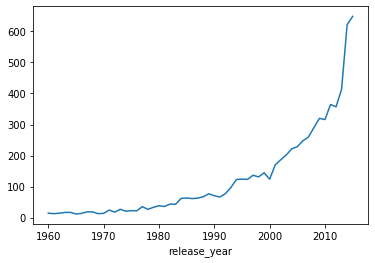

In [15]:
# plot the relationship between popularity and release year
dfg['popularity'].plot()

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


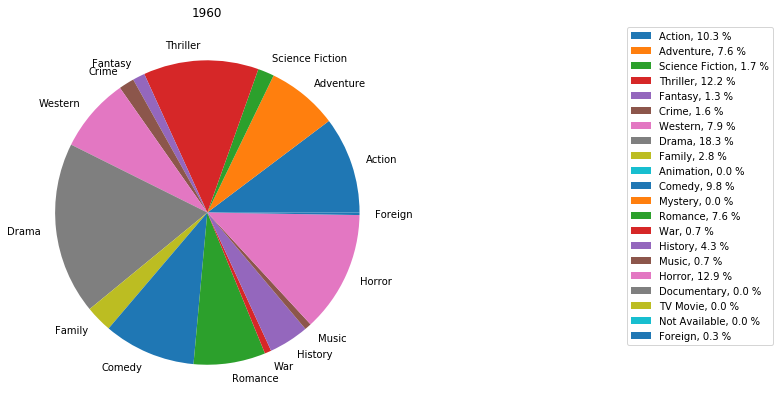

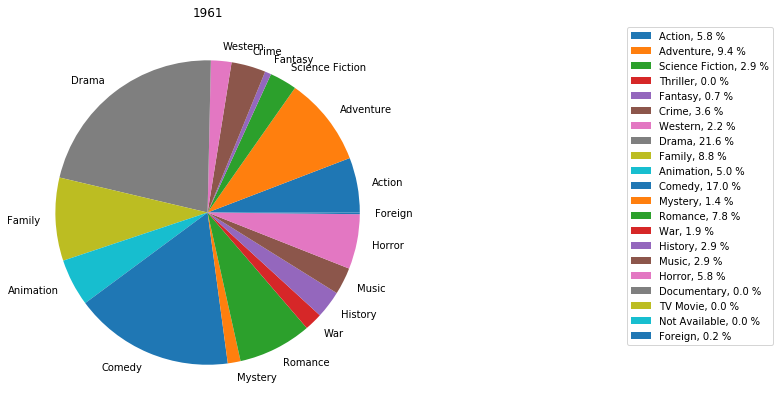

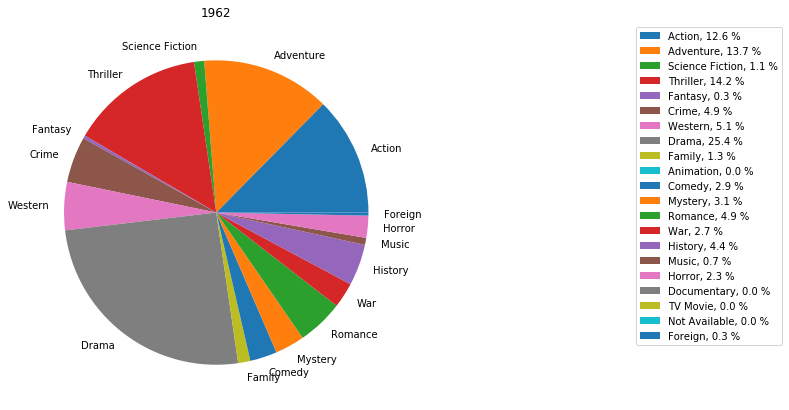

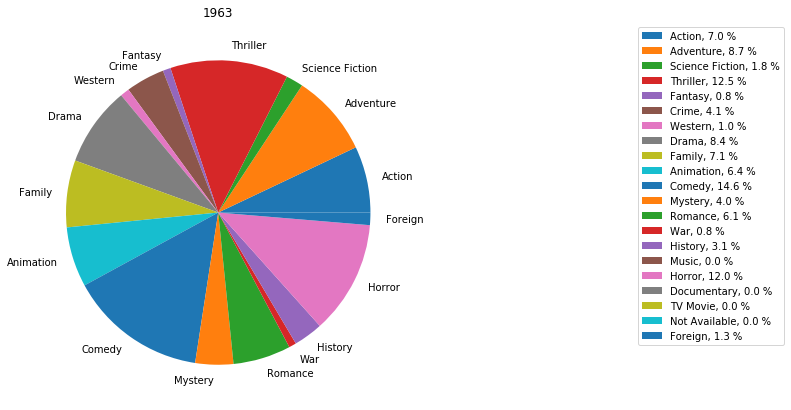

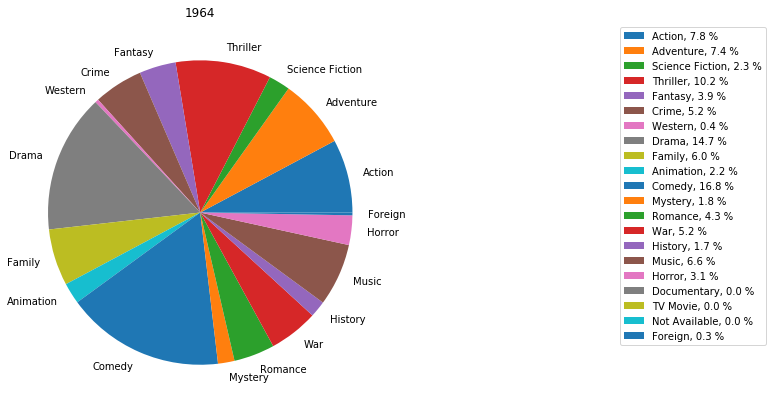

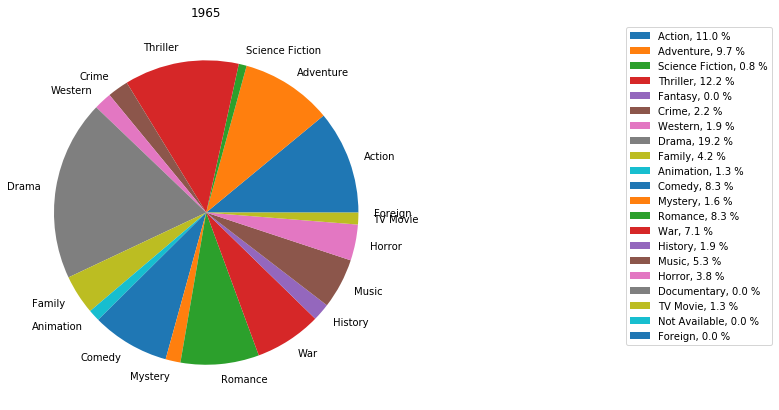

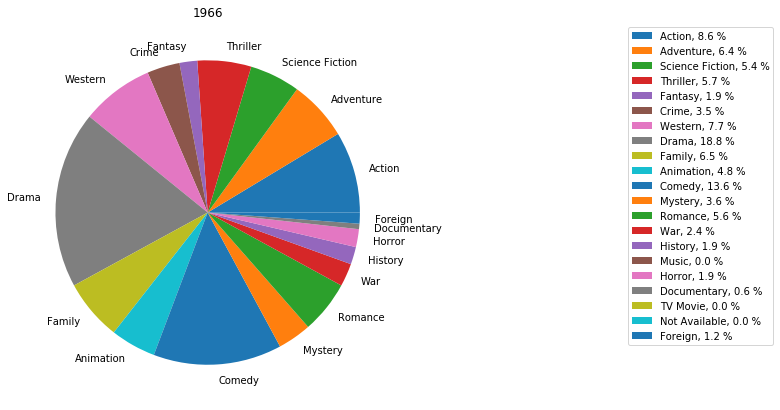

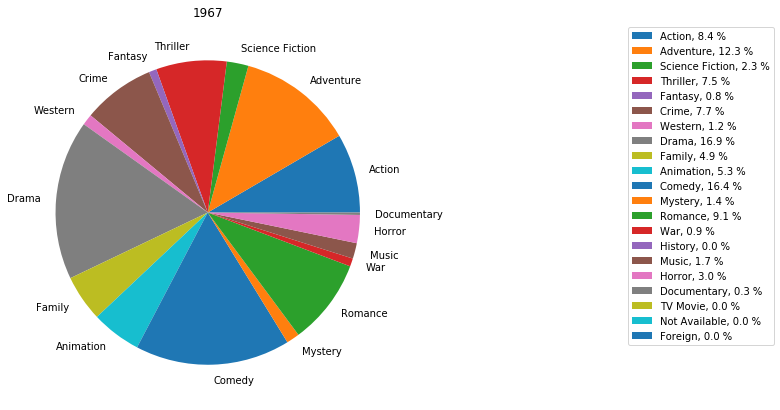

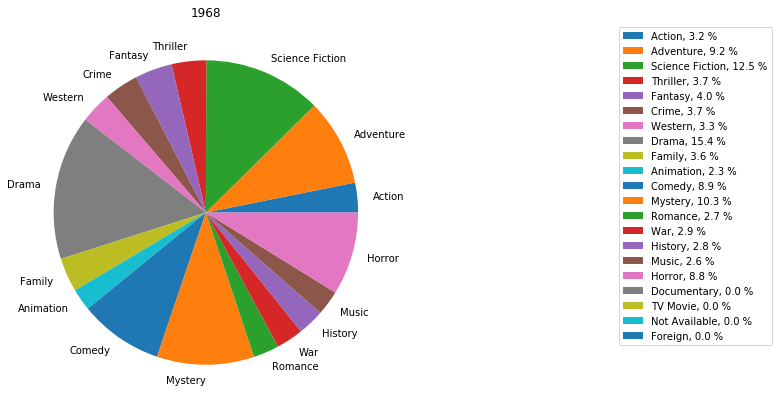

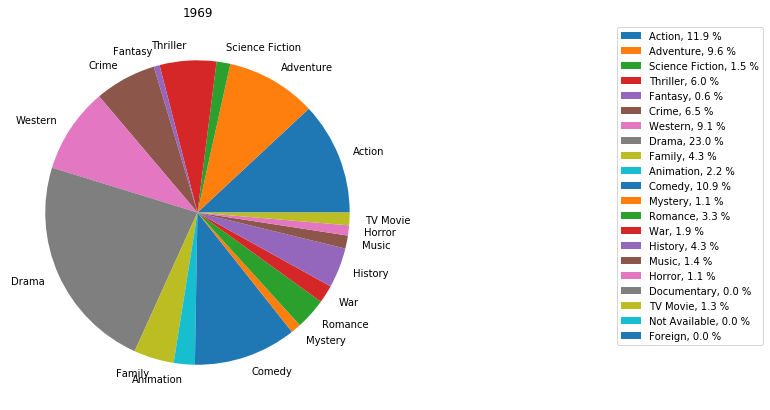

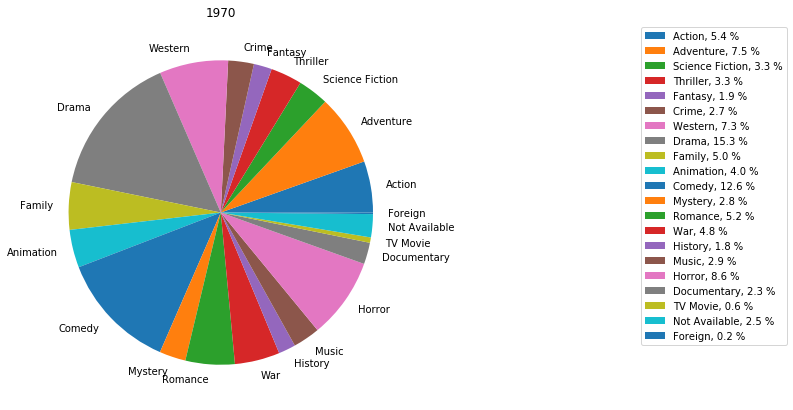

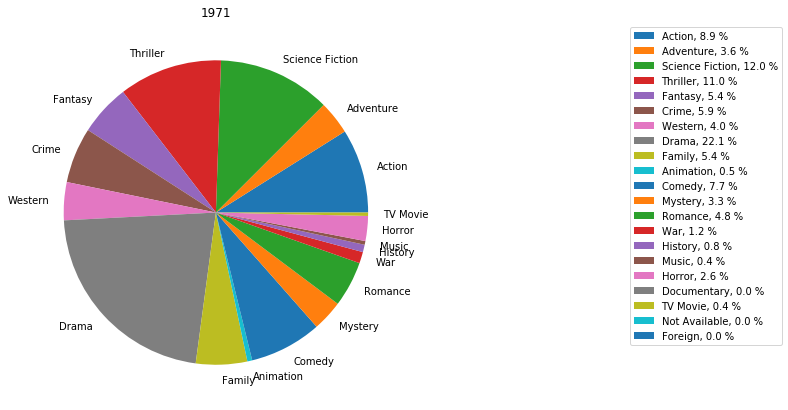

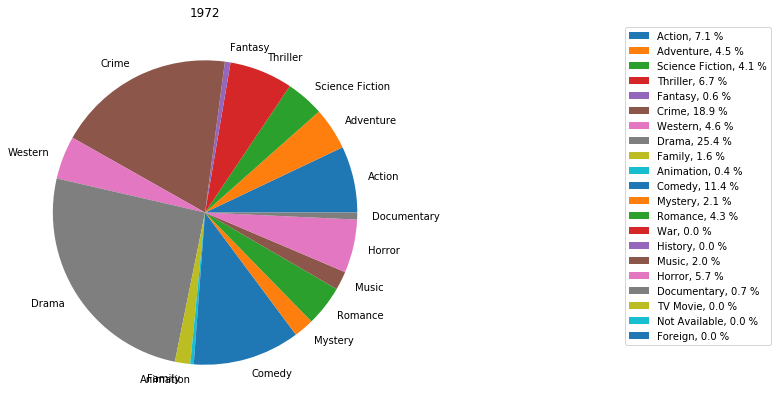

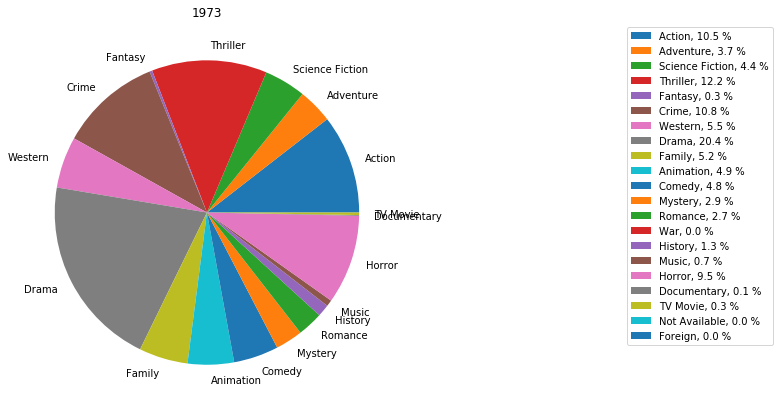

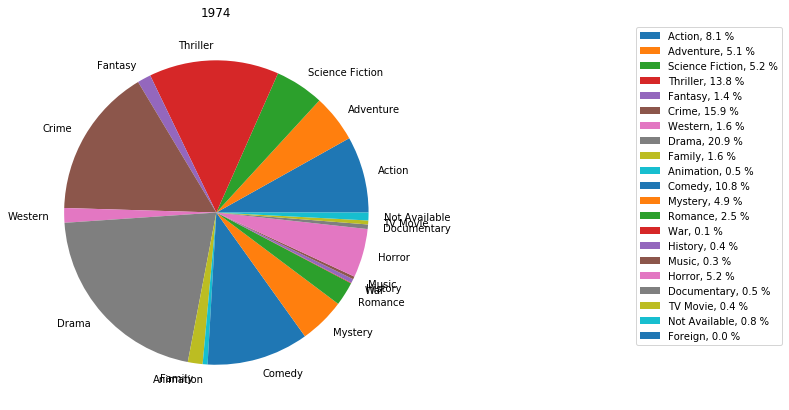

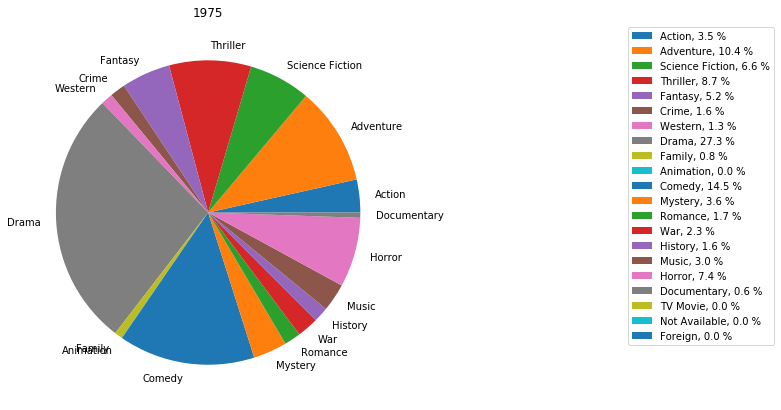

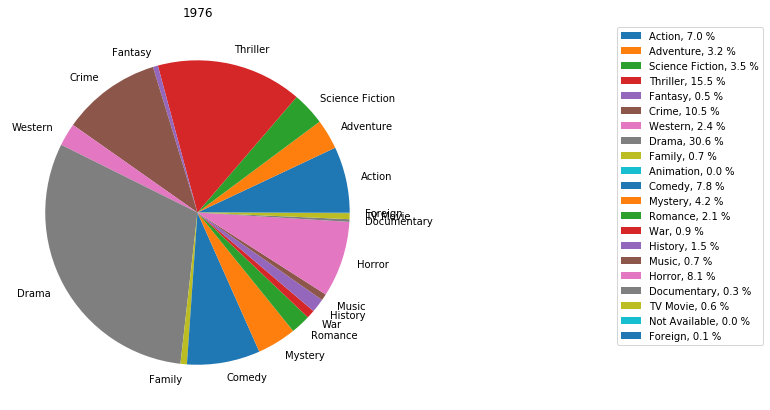

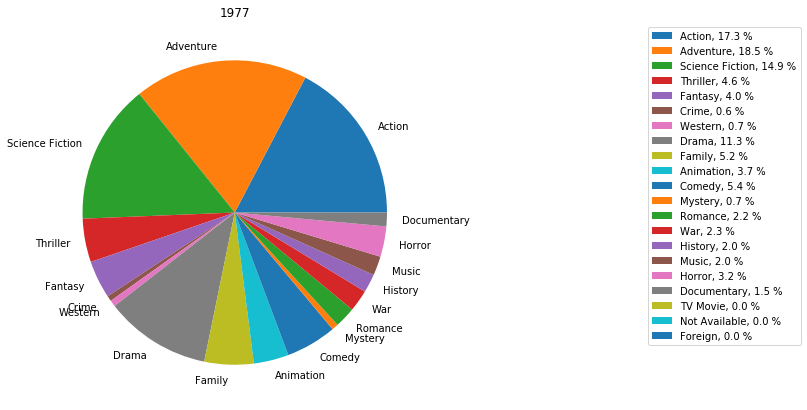

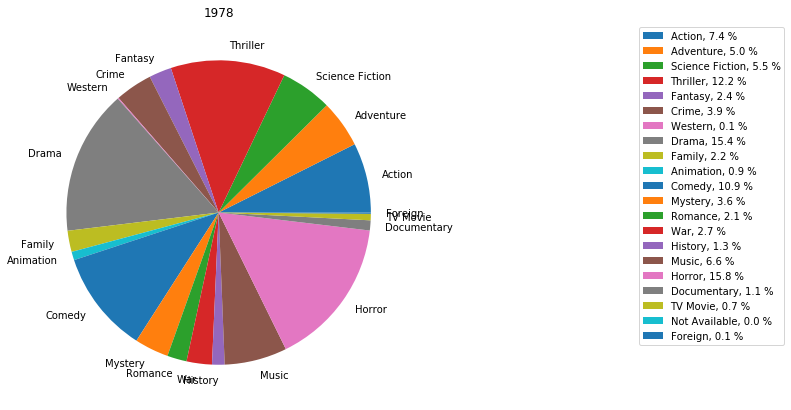

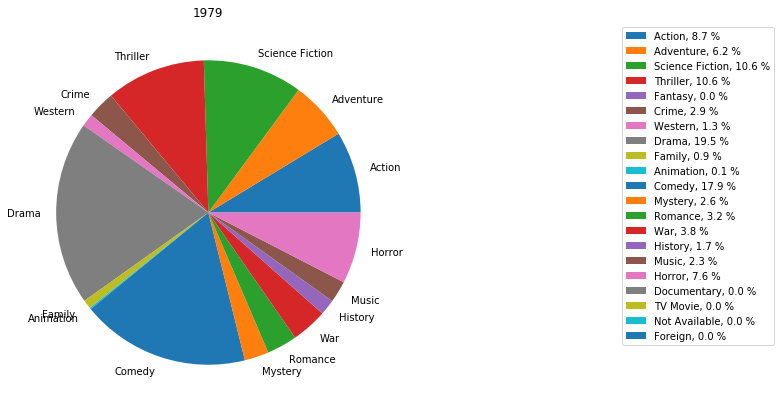

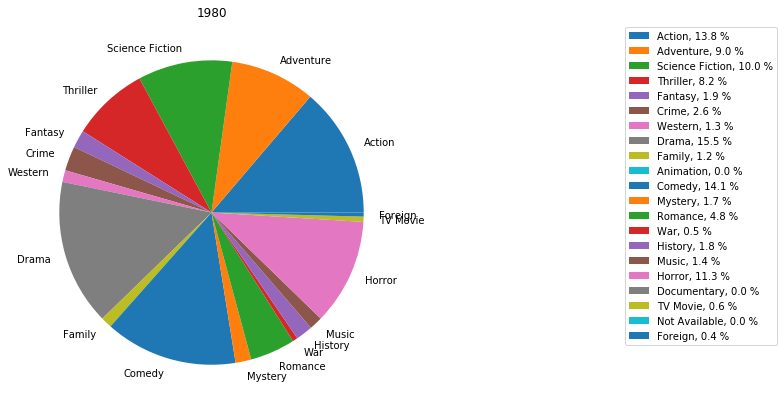

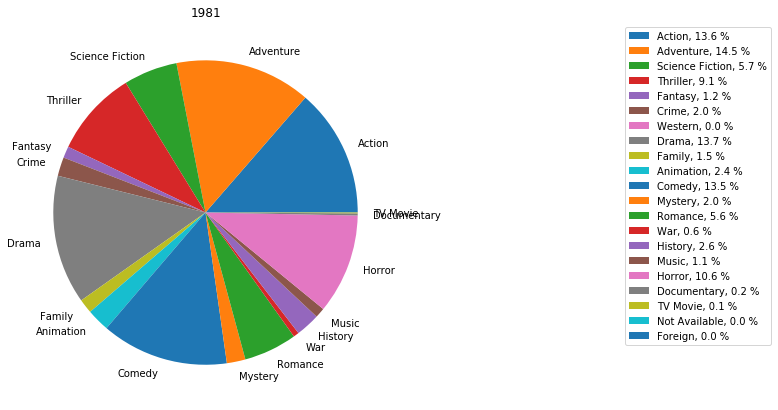

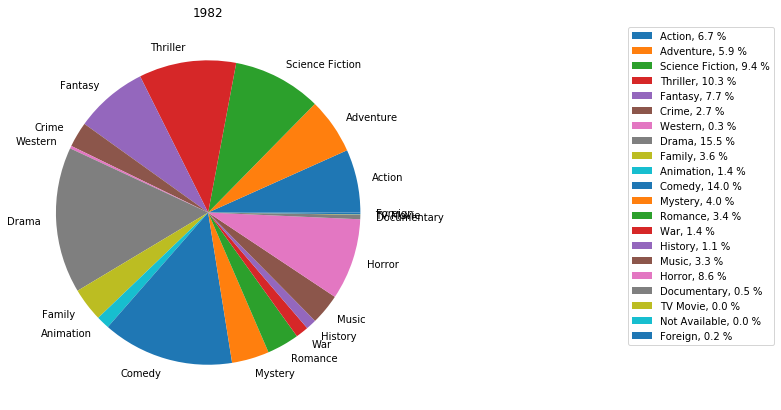

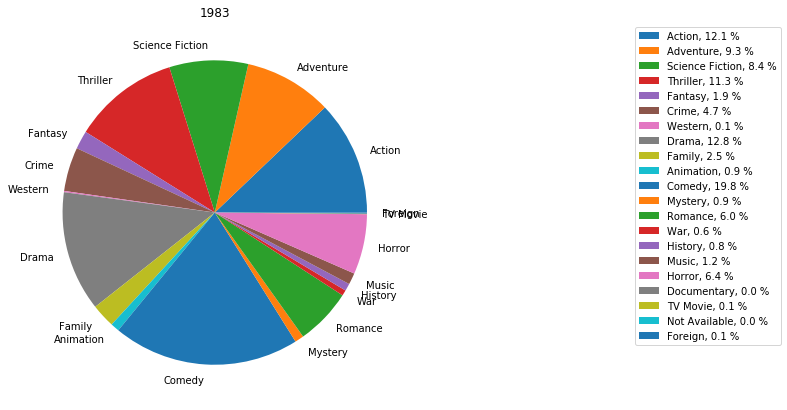

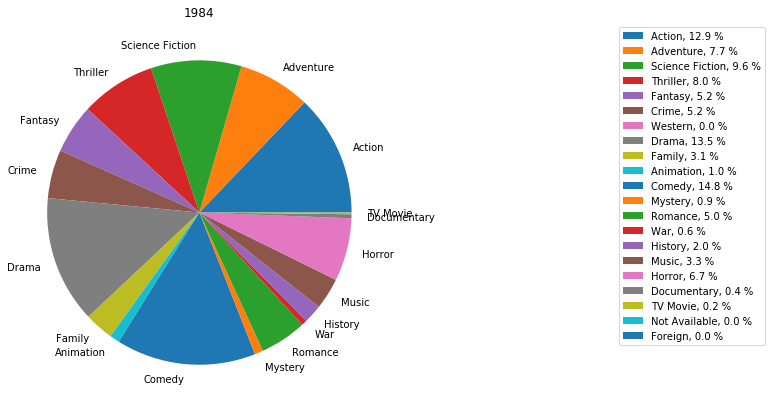

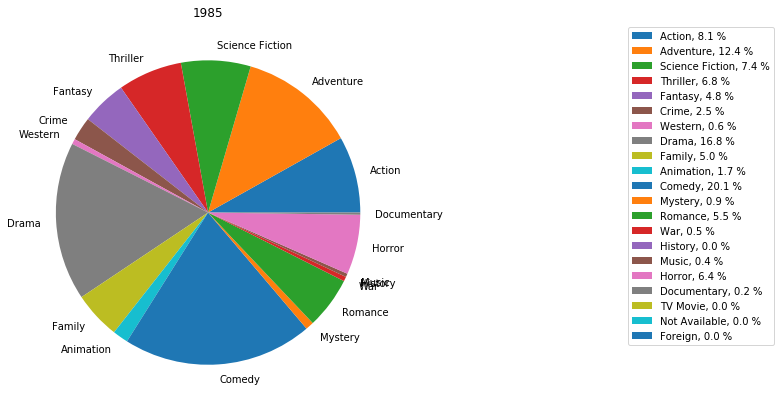

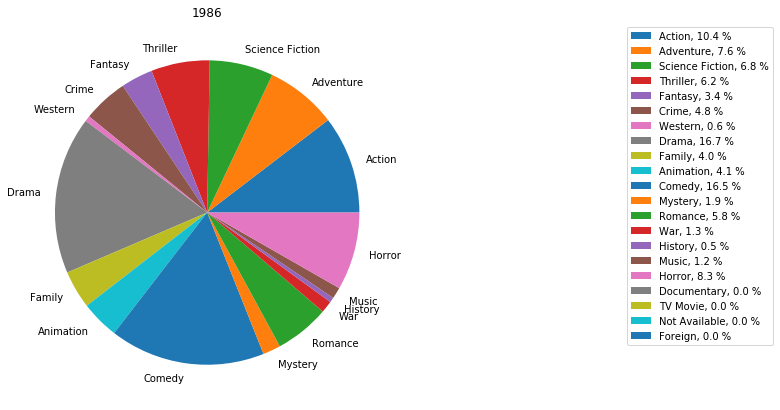

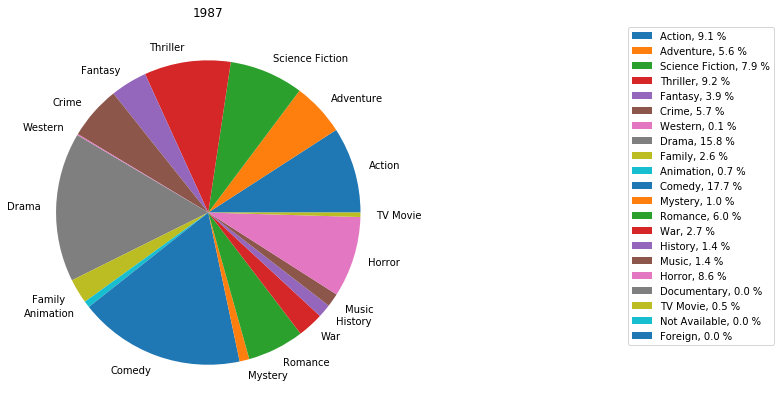

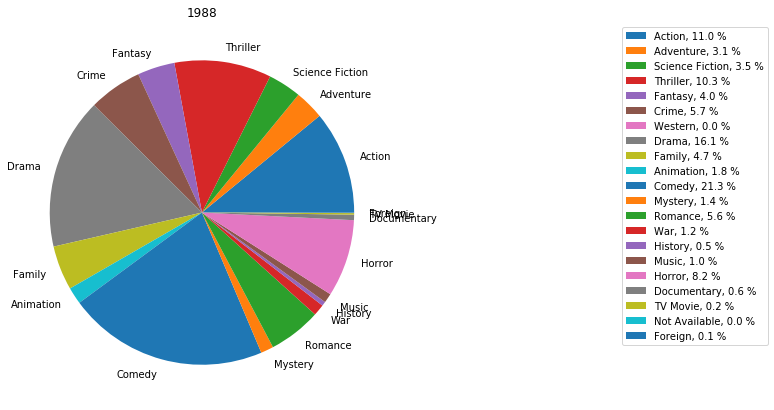

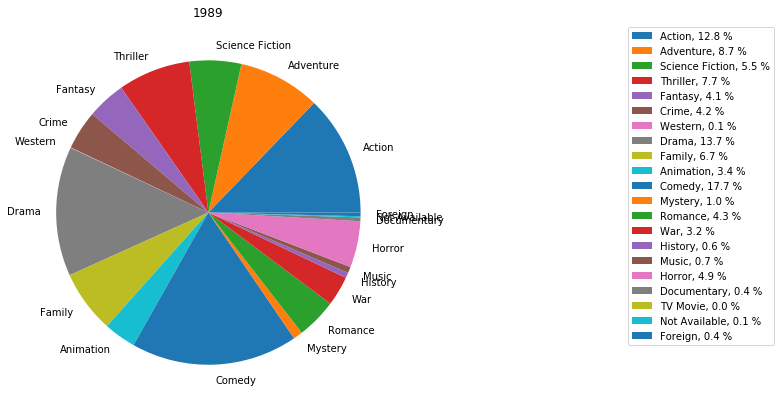

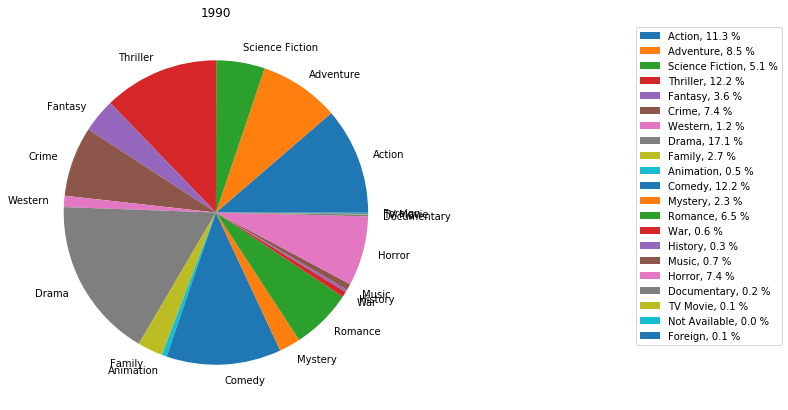

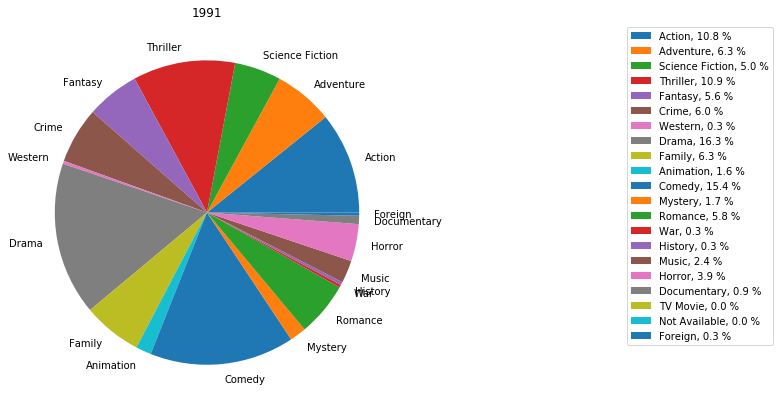

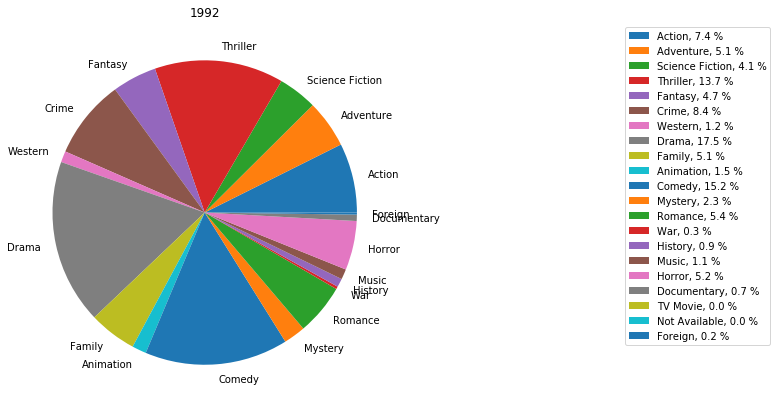

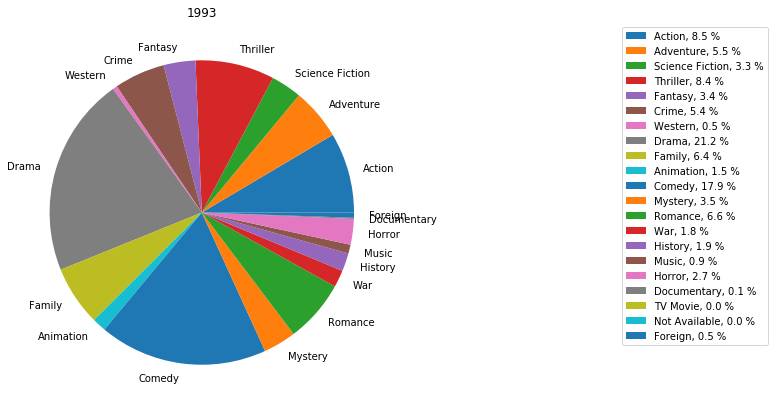

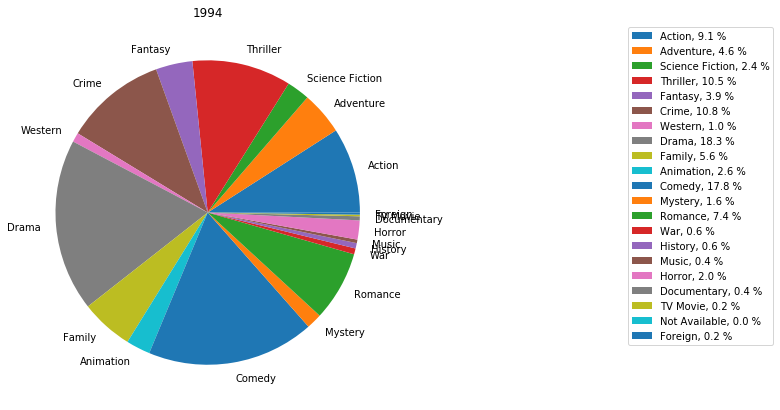

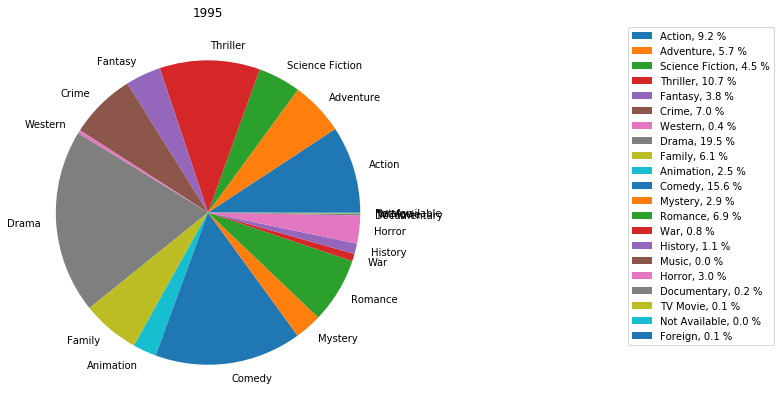

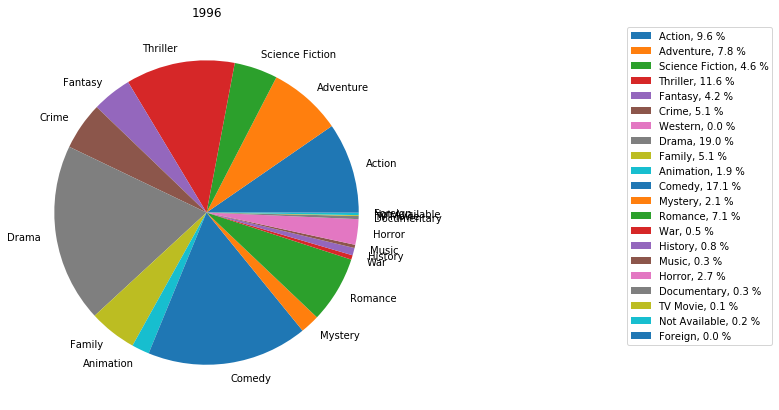

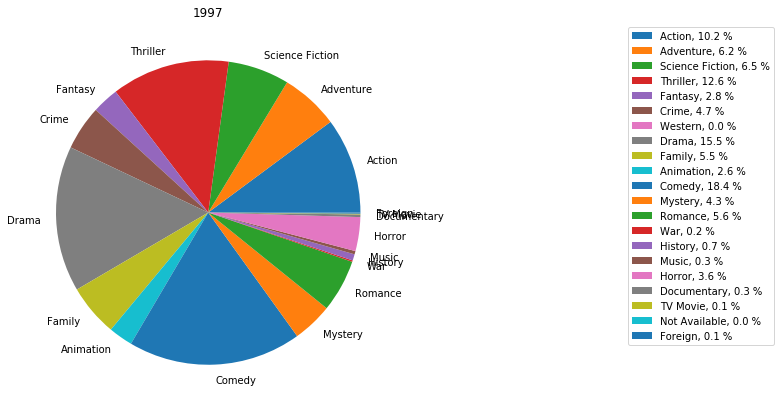

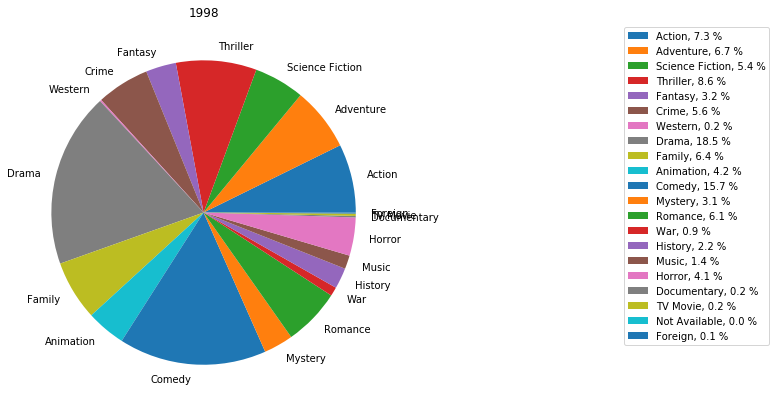

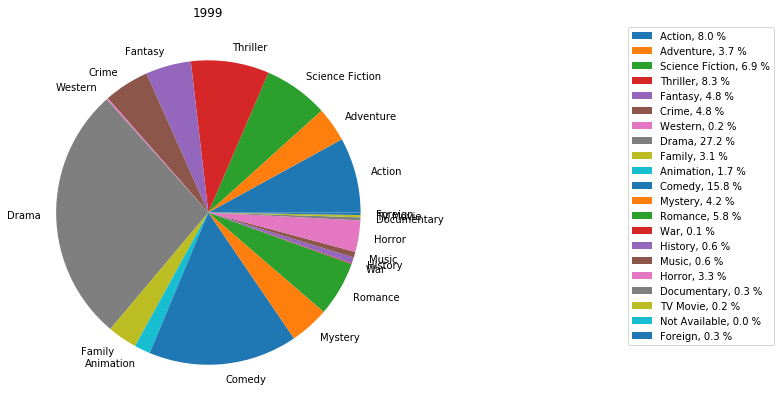

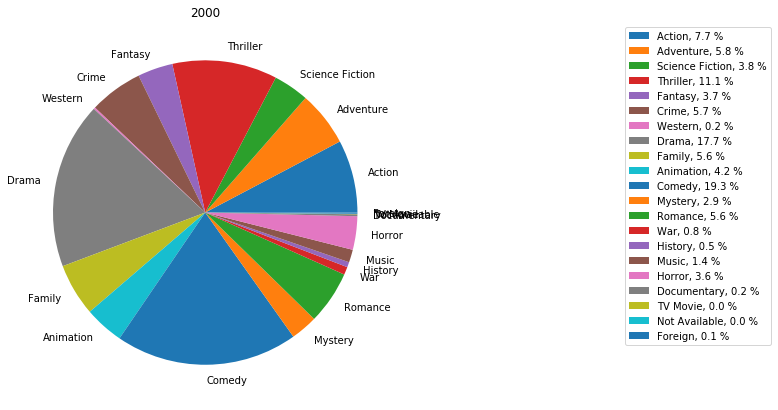

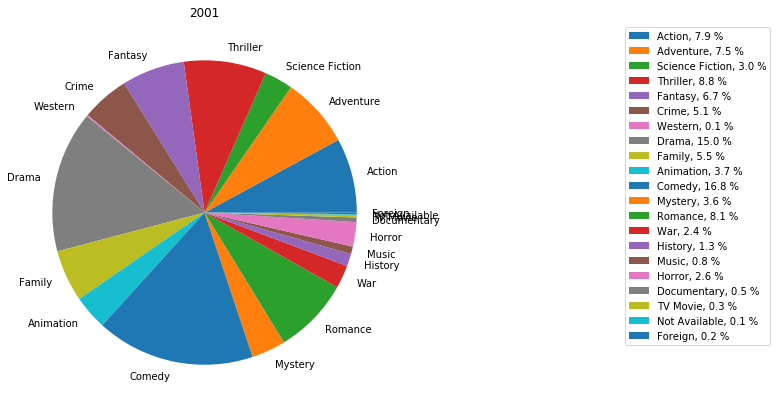

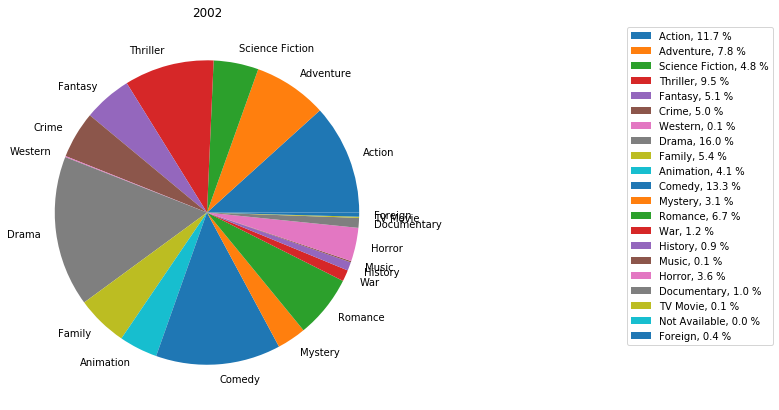

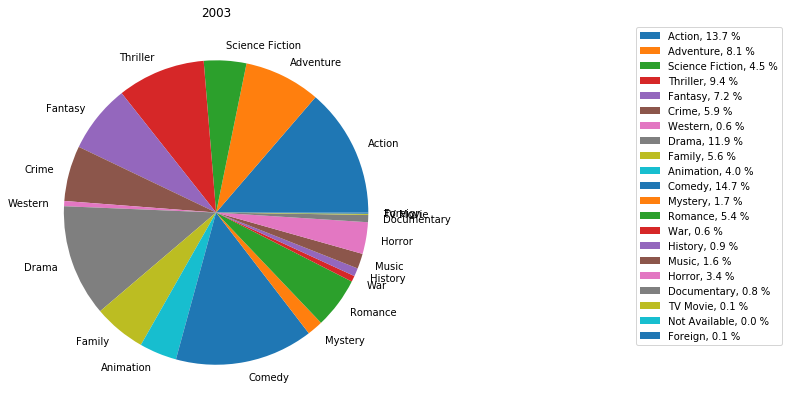

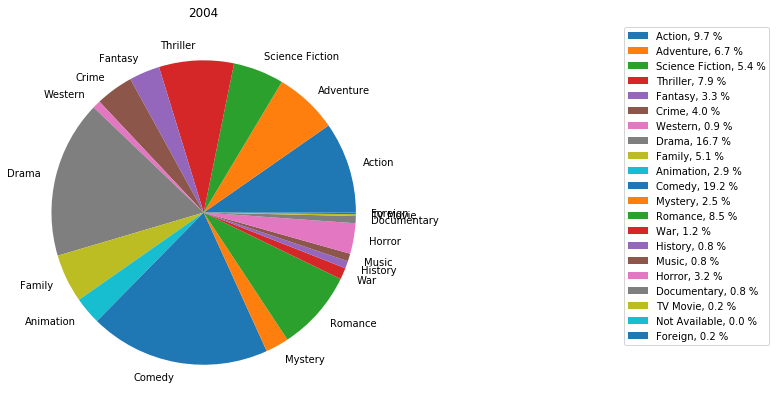

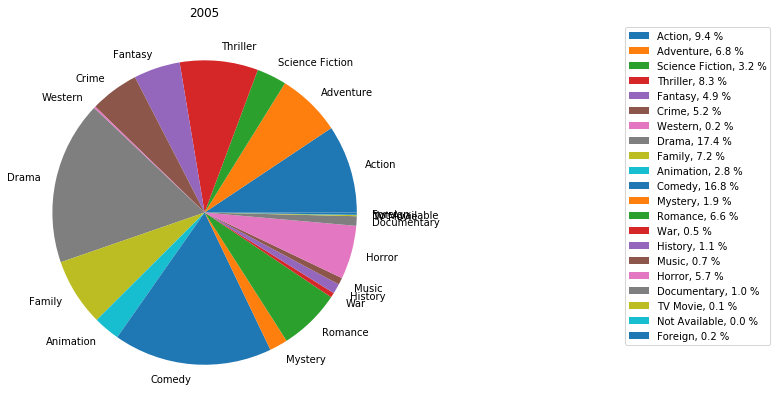

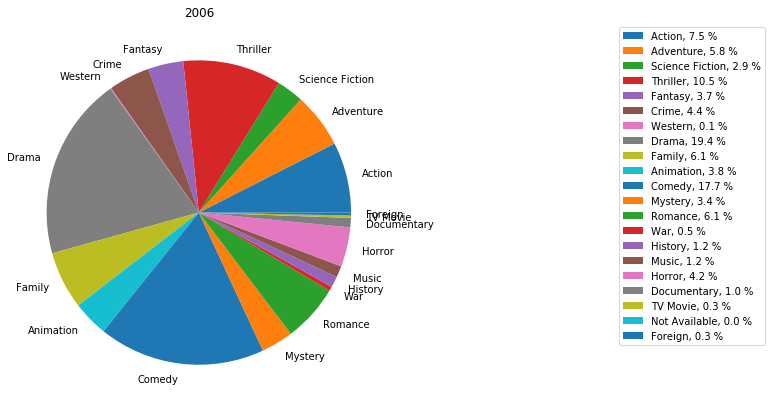

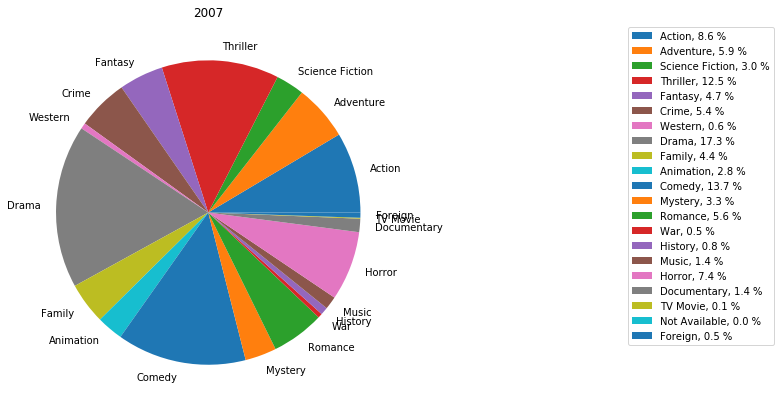

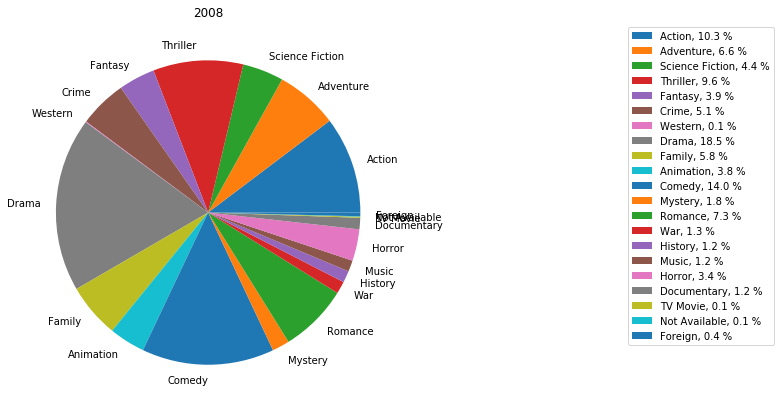

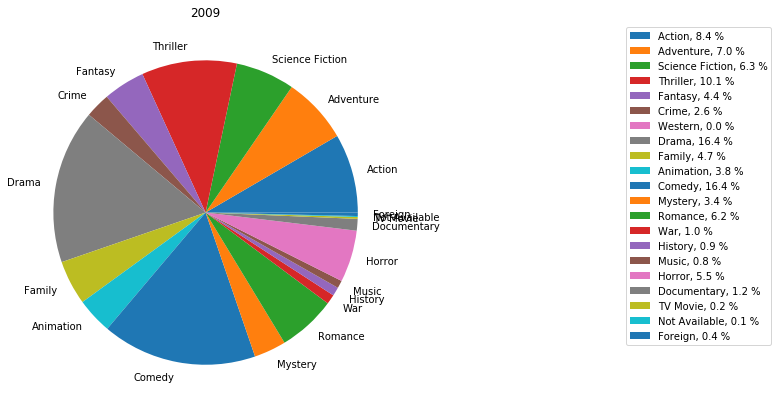

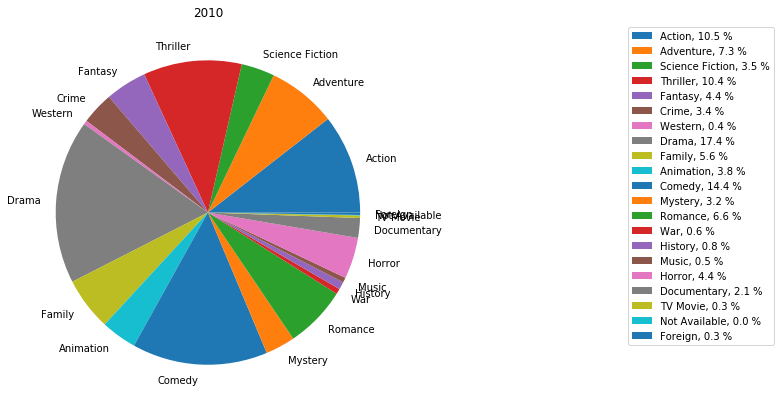

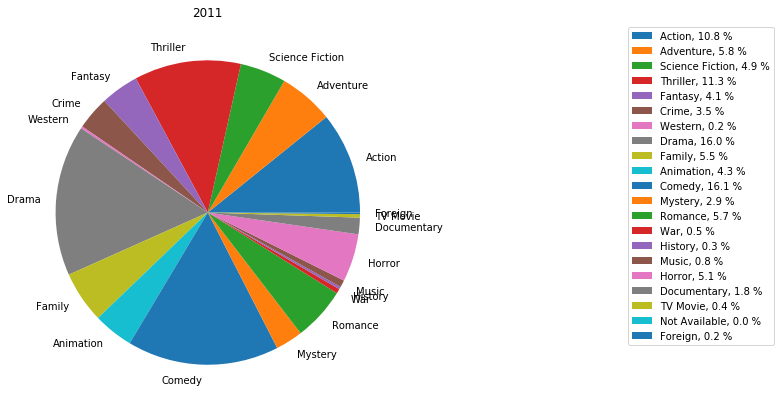

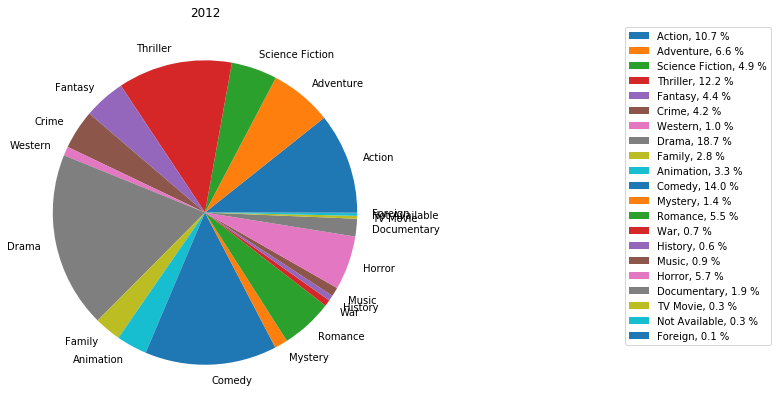

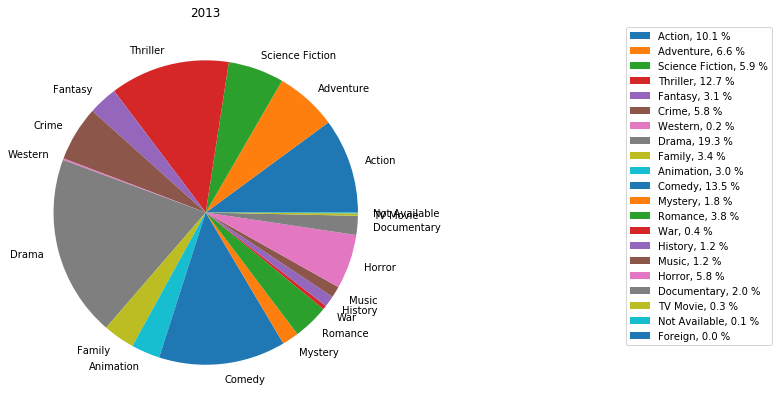

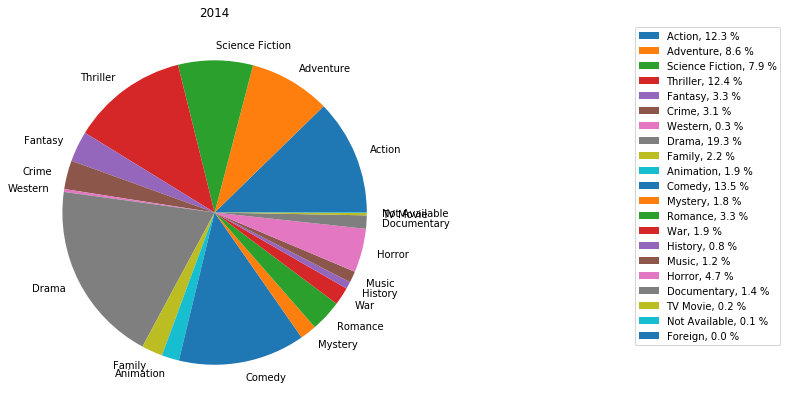

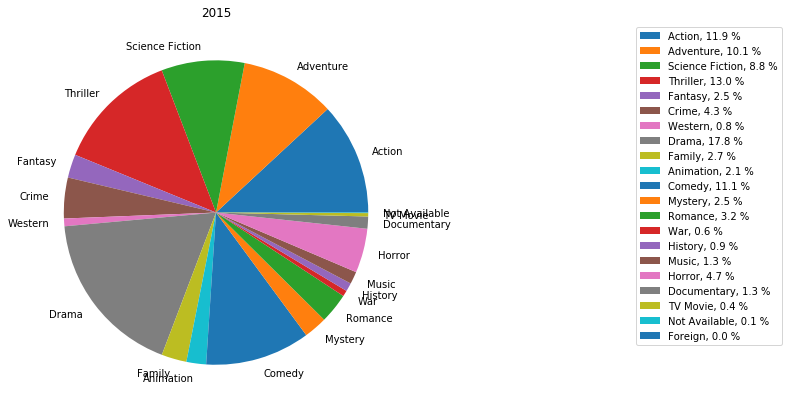

In [16]:
# Display pie chart of genres popularity percentage for each year
for year in range(len(dfg)):
    dfy = pd.DataFrame({'genres': (dfg.iloc[year,1:].values/dfg.iloc[year,0:1].values) * 100},
                   index=dfg.columns[1:])
    plot = dfy.plot.pie(y='genres', figsize=Figure(15, 7),legend=None,fontsize=10)#,autopct='%1.1f%%'
    #plot = dfy.plot.bar(y='genres')
    plt.legend(loc='upper right',bbox_to_anchor=(2, 1),labels=['%s, %1.1f %%' % (l, s) for l, s in zip(dfy.index, dfy.genres)])
    plot.set_title(dfg.index[year]) 
    plot.set_ylabel(None)

In [17]:
#List most popular genres in each year
dfgm=dfg.drop(columns=['popularity'])
result=dfgm.idxmax(axis = 1)
print(result)

release_year
1960        Drama
1961        Drama
1962        Drama
1963       Comedy
1964       Comedy
1965        Drama
1966        Drama
1967        Drama
1968        Drama
1969        Drama
1970        Drama
1971        Drama
1972        Drama
1973        Drama
1974        Drama
1975        Drama
1976        Drama
1977    Adventure
1978       Horror
1979        Drama
1980        Drama
1981    Adventure
1982        Drama
1983       Comedy
1984       Comedy
1985       Comedy
1986        Drama
1987       Comedy
1988       Comedy
1989       Comedy
1990        Drama
1991        Drama
1992        Drama
1993        Drama
1994        Drama
1995        Drama
1996        Drama
1997       Comedy
1998        Drama
1999        Drama
2000       Comedy
2001       Comedy
2002        Drama
2003       Comedy
2004       Comedy
2005        Drama
2006        Drama
2007        Drama
2008        Drama
2009       Comedy
2010        Drama
2011       Comedy
2012        Drama
2013        Drama
2014        Dra

As a result of analysis drama is the most popular genres in most years followed by comdey then two for adventure and one for
horror
From pie chart Action and Thriller take high percent in most years

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [18]:
#Create new dataframe to only contain data needed for question one for simplicty
dfr= movi_df
dfr['genreslist']=dfr['genres'].str.split("|")
dfr=create_genres_col(dfr)
#Modify dataframe to contain column for each genres that contain revenue related to it as a percentage to all genres 
# related to this  revenue value
for i in range(len(dfr['genreslist'])):
     for m in range(len(dfr['genreslist'][i])):
        genres= dfr['genreslist'][i][m]
        dfr[genres][i]=(dfr['revenue'][i] / len(dfr['genreslist'][i]) )     


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [19]:
# get properies of high revenue movies and display it
dfr_p=dfr.sort_values(by=['revenue'], ascending=False)
dfr_p=dfr_p.head(20)
dfr_p.head(20)

popularity     budget     revenue  \
1386    9.432768  237000000  2781505847   
3      11.173104  200000000  2068178225   
5231    4.355219  200000000  1845034188   
4361    7.637767  220000000  1519557910   
0      32.985763  150000000  1513528810   
4       9.335014  190000000  1506249360   
14      5.944927  280000000  1405035767   
3374    5.711315  125000000  1327817822   
5422    6.112766  150000000  1274219009   
5425    4.946136  200000000  1215439994   
8       7.404165   74000000  1156730962   
3522    0.760503  195000000  1123746996   
4949    7.122455   94000000  1118888979   
4365    5.603587  200000000  1108561013   
8094    1.136610   22000000  1106279658   
4363    6.591277  250000000  1081041287   
6555    4.205992  200000000  1065659812   
1930    2.711136  200000000  1063171911   
1921    5.572950  200000000  1025467110   
3375    4.955130  380000000  1021683000   

                                     original_title  \
1386                                         Avatar   
3                      Star Wars: The Force Awakens   
5231                                        Titanic   
4361                                   The Avengers   
0                                    Jurassic World   
4                                         Furious 7   
14                          Avengers: Age of Ultron   
3374   Harry Potter and the Deathly Hallows: Part 2   
5422                                         Frozen   
5425                                     Iron Man 3   
8                                           Minions   
3522                 Transformers: Dark of the Moon   
4949  The Lord of the Rings: The Return of the King   
4365                                        Skyfall   
8094                                        The Net   
4363                          The Dark Knight Rises   
6555     Pirates of the Caribbean: Dead Man's Chest   
1930                                    Toy Story 3   
1921                            Alice in Wonderland   
3375    Pirates of the Caribbean: On Stranger Tides   

                                                   cast  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
5231  Kate Winslet|Leonardo DiCaprio|Frances Fisher|...   
4361  Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...   
0     Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
4     Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
14    Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...   
3374  Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...   
5422  Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...   
5425  Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...   
8     Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
3522  Shia LaBeouf|John Malkovich|Ken Jeong|Frances ...   
4949  Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...   
4365  Daniel Craig|Judi Dench|Javier Bardem|Ralph Fi...   
8094  Sandra Bullock|Jeremy Northam|Dennis Miller|We...   
4363  Christian Bale|Michael Caine|Gary Oldman|Anne ...   
6555  Johnny Depp|Orlando Bloom|Keira Knightley|Bill...   
1930  Tom Hanks|Tim Allen|Ned Beatty|Joan Cusack|Mic...   
1921  Mia Wasikowska|Johnny Depp|Anne Hathaway|Helen...   
3375  Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...   

                      director  \
1386             James Cameron   
3                  J.J. Abrams   
5231             James Cameron   
4361               Joss Whedon   
0              Colin Trevorrow   
4                    James Wan   
14                 Joss Whedon   
3374               David Yates   
5422   Chris Buck|Jennifer Lee   
5425               Shane Black   
8     Kyle Balda|Pierre Coffin   
3522               Michael Bay   
4949             Peter Jackson   
4365                Sam Mendes   
8094             Irwin Winkler   
4363         Christopher Nolan   
6555            Gore Verbinski   
1930               Lee Unkrich   
1921                Tim Burton   
3375              Rob Mars

In the next cells i will take some feature which is text feature  and see which value of them  is realted to high revenue top 20 record,by calculate conunt

In [20]:
dfr_p['director'].value_counts()

James Cameron               2
Joss Whedon                 2
Shane Black                 1
J.J. Abrams                 1
James Wan                   1
Colin Trevorrow             1
Irwin Winkler               1
Christopher Nolan           1
Tim Burton                  1
Michael Bay                 1
Gore Verbinski              1
Chris Buck|Jennifer Lee     1
Lee Unkrich                 1
Sam Mendes                  1
David Yates                 1
Peter Jackson               1
Kyle Balda|Pierre Coffin    1
Rob Marshall                1
Name: director, dtype: int64

 we see that both 'James Camero'and'Joss Whedon' every one have two movie of first twenty high revenue movies

In [21]:
dfr_p['production_companies'].value_counts()

Marvel Studios                                                                                                2
Columbia Pictures                                                                                             2
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            1
Paramount Pictures|Di Bonaventura Pictures|Hasbro|Indochina Productions                                       1
Lucasfilm|Truenorth Productions|Bad Robot                                                                     1
Legendary Pictures|Warner Bros.|DC Entertainment|Syncopy                                                      1
Walt Disney Pictures|Walt Disney Animation Studios                                                            1
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    1
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                

we see that both 'Columbia Pictures 'and'Marvel Studios ' every one have two movie of first twenty high revenue movies

In the next cell we will explore the relation of high revenu with genres

In [22]:
# create summary data frame for top 20 high revenu records
dfrs=dfr.sum()
dfrss=pd.DataFrame(dfrs)
dfrss.head(20)

0
popularity                                                      7024.23
budget                                                     158922868089
revenue                                                    432720192875
original_title        Jurassic WorldMad Max: Fury RoadInsurgentStar ...
cast                  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director              Colin TrevorrowGeorge MillerRobert SchwentkeJ....
overview              Twenty-two years after the events of Jurassic ...
runtime                                                         1109102
genres                Action|Adventure|Science Fiction|ThrillerActio...
production_companies  Universal Studios|Amblin Entertainment|Legenda...
release_date          6/9/20155/13/20153/18/201512/15/20154/1/201512...
release_year                                                   21746372
budget_adj                                                   1.9071e+11
revenue_adj                                                 5.58125e+11
genreslist            [Action, Adventure, Science Fiction, Thriller,...
Action                                                      5.46269e+10
Adventure                                                   4.95836e+10
Science Fiction                                             2.58366e+10
Thriller                                                    3.86511e+10
Fantasy                                                     2.60845e+10

Text(0, 0.5, '')

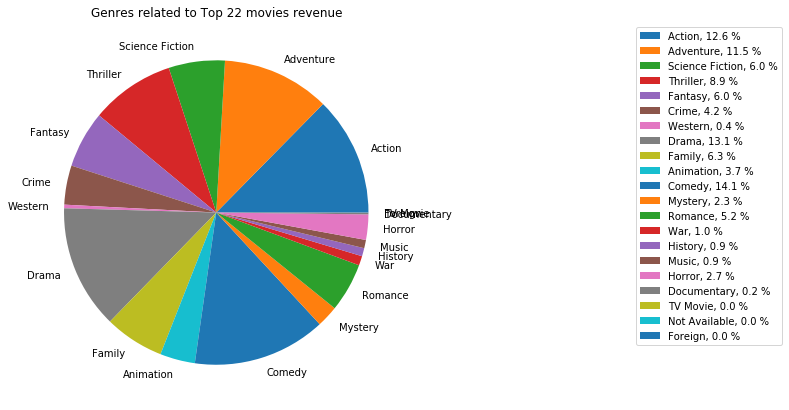

In [23]:
# Display pie chart of genres revenue percentage for top 20 revenue
dfrm = pd.DataFrame({'genres': (dfrss.iloc[15:,0]/dfrss.iloc[2,0]) * 100},
                   index=dfrss.index[15:])
plot = dfrm.plot.pie(y='genres', figsize=(15, 7),legend=None,fontsize=10)#,autopct='%1.1f%%'
#plot = dfy.plot.bar(y='genres')
plt.legend(loc='upper right',bbox_to_anchor=(2, 1),labels=['%s, %1.1f %%' % (l, s) for l, s in zip(dfrm.index, dfrm.genres)])
plot.set_title("Genres related to Top 22 movies revenue" ) 
plot.set_ylabel(None)


As a result most associated genres with top 20 high revenue movies is Comedy,Drama,Action,Adventure 

In the next cell we will display relation between top 20 revenue and some numeric features

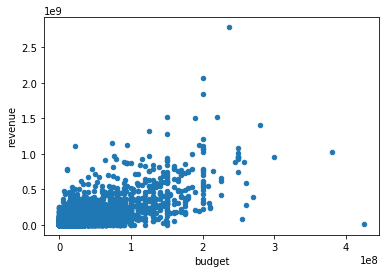

In [24]:
plot = dfr.plot.scatter(x='budget',y='revenue')

from above chart budget is not highly related for high revenue

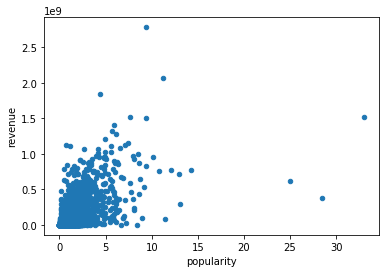

In [25]:
plot = dfr.plot.scatter(x='popularity',y='revenue')

from above chart popularity is not responsilbe for high revenue

<a id='conclusions'></a>
## Conclusions

# Research Question 1 (Which genres are most popular from year to year is as following:
Drama is the most popular genres in most years followed by Comdey then two for Adventure and one for Horror.
From pie chart Action and Thriller take high percent in most years and pie chart give us the needed granularity level for every year

# Research Question 2 What kinds of properties are associated with movies that have high revenues ia as following:
We have a list of all associated properties for top 20 revenue
we see that both director 'James Camero'and'Joss Whedon' every one have two movie of first twenty high revenue movies and get list of other director involved.
we see that both production companies 'Columbia Pictures 'and'Marvel Studios ' every one have two movie of first twenty high revenue movies and get list of other production companies involved.
Most associated genres with top 20 high revenue movies is Comedy,Drama,Action,Adventure and pie chart give us the needed granularity level.
Popularity is not responsilbe for high revenue.
Budget is not highly related for high revenue
** Limitation long period of time can make top 20 revenue is not accurate for far years since the value of money is changed and we don't have this rate.